## Group No

## Group Member Names:
1.GORLA HEMA VISHAL	(2021sc04273)

2.PATTANAYAK ASIS RANJAN (2021sc04438)

3.NAVIN KUMAR	(2021sc04553)

4.ASHLESH B R	(2021sc04863)

# 1. Import the required libraries

In [3]:
# Downloading all necessary Libraries and Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile as zip
import tensorflow as tf

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [4]:
# Loading the Training Data
!wget --no-check-certificate \
    "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"

# Loading the Validation Data
!wget --no-check-certificate \
  "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

--2023-06-23 16:13:01--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   168MB/s    in 0.9s    

2023-06-23 16:13:02 (168 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2023-06-23 16:13:02--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 

In [5]:
#appedning the data and checking the size of data
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# Training horses
print(f"Total training horse images: {len(os.listdir(train_horse_dir))}")

# Training humans
print(f"Total training humans images: {len(os.listdir(train_human_dir))}")

# Validation horses
print(f"Total validation horse images: {len(os.listdir(validation_horse_dir))}")

# Validation humans
print(f"Total validation humans images: {len(os.listdir(validation_human_dir))}")

--2023-06-23 16:13:02--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  21.5MB/s    in 4.3s    

2023-06-23 16:13:07 (33.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2023-06-23 16:13:07--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicat

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



Total images in the dataset: 1283


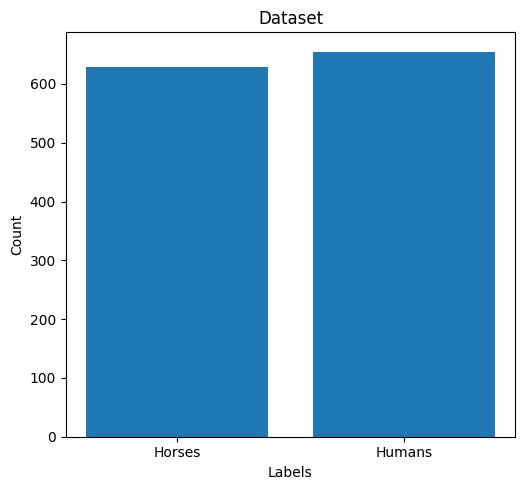

In [4]:
# Appending all data
data = []
labels = []

# Appending training horse data with label 0
for img_file in os.listdir(train_horse_dir):
    img_path = os.path.join(train_horse_dir, img_file)
    data.append(img_path)
    labels.append(0)

# Appending training human data with label 1
for img_file in os.listdir(train_human_dir):
    img_path = os.path.join(train_human_dir, img_file)
    data.append(img_path)
    labels.append(1)

# Appending validation horse data with label 0
for img_file in os.listdir(validation_horse_dir):
    img_path = os.path.join(validation_horse_dir, img_file)
    data.append(img_path)
    labels.append(0)

# Appending validation human data with label 1
for img_file in os.listdir(validation_human_dir):
    img_path = os.path.join(validation_human_dir, img_file)
    data.append(img_path)
    labels.append(1)

# Converting lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Checking the size of the appended dataset
print(f"Total images in the dataset: {len(data)}")

# Checking the count of labels in training and validation datasets
data_counts = np.bincount(labels[:len(data)])
validation_counts = np.bincount(labels[len(validation_horse_dir) + len(validation_human_dir):])

# Plotting the counts
categories = ['Horses', 'Humans']
data_labels = [0, 1]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(data_labels, data_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Dataset')
plt.xticks(data_labels, categories)

plt.tight_layout()
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


##---------Type the code below this line------------------##
we performed the following preprocessing steps:

we have done resizing, by Normalizing the pixel values of the images to the range [0, 1] by dividing them by 255.

target variables are already encoded

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [7]:
#Tagrget vaiable is identified 1 indicate humans and 0 indicates horses


## 3.3 Split the data into training set and testing set

In [8]:
# Split the data into features (X) and labels (Y)
X_train, Y_train = next(train_generator)
X_validation, Y_validation = next(validation_generator)

# Print the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"Y_validation shape: {Y_validation.shape}")

X_train shape: (128, 300, 300, 3)
Y_train shape: (128,)
X_validation shape: (32, 300, 300, 3)
Y_validation shape: (32,)


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [7]:
##---------Type the answer below this line------------------##

we have used normalization techique. since it is image classificatioin ImageDataGenerator converts the pixel values to floating-point numbers. This step is necessary because the division operation (/) requires the operands to have a floating-point data type.

/ 255.0 performs element-wise division of the pixel values by 255.0. Since pixel values are typically represented as integers in the range [0, 255], dividing by 255.0 scales them to the range [0, 1].

The purpose of this normalization technique is to standardize the pixel values and bring them into a consistent scale. This can be beneficial for training deep learning models as it helps in achieving better convergence during training. Normalizing the pixel values to the range [0, 1] ensures that all features (pixels) have a similar impact on the model's learning process.

By dividing the pixel values by 255.0, the code ensures that the normalized pixel values lie within the range [0, 1].


#Total horse images: 500
#Total  humans images: 527
#Total validation horse images: 128
#Total validation humans images: 128






# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [9]:
##---------Type the code below this line------------------##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))

# Add hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification or 'softmax' for multi-class classification

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300, 300, 8)       32        
                                                                 
 dense_1 (Dense)             (None, 300, 300, 64)      576       
                                                                 
 dense_2 (Dense)             (None, 300, 300, 64)      4160      
                                                                 
 dense_3 (Dense)             (None, 300, 300, 1)       65        
                                                                 
Total params: 4,833
Trainable params: 4,833
Non-trainable params: 0
_________________________________________________________________


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



##---------Type the answer below this line------------------##

Number of Layers:

The architecture consists of 4 layers: 1 input layer, 2 hidden layers, and 1 output layer.

Number of Units in Each Layer:

Input Layer: The number of units in the input layer is determined by the input_dim value, which represents the number of features in your input data. currently we have 1 feature, the input layer has 8 unit.
Hidden Layers: The hidden layers are defined with 64 units each, respectively.
Output Layer: The output layer has 1 unit, which corresponds to the binary classification task of distinguishing between horse and human.


#Total number of trainable parameters: 4,833

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [10]:
##---------Type the code below this line------------------##
# Compile the model
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Define the number of folds for cross-validation
n_splits = 5

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
loss_scores = []
total_time = 0

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Iterate over the folds
for fold, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train), 1):
    print(f"Training for fold {fold}...")

    # Get the training and validation data for the current fold
    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    Y_train_fold, Y_validation_fold = Y_train[train_index], Y_train[validation_index]

    # Convert grayscale images to RGB
    if X_train_fold.shape[-1] == 1:
        X_train_fold = np.repeat(X_train_fold, 3, axis=-1)
    if X_validation_fold.shape[-1] == 1:
        X_validation_fold = np.repeat(X_validation_fold, 3, axis=-1)

    # Reshape the labels to match the shape of the logits
    Y_train_fold = np.expand_dims(Y_train_fold, axis=-1)
    Y_validation_fold = np.expand_dims(Y_validation_fold, axis=-1)

    # Build the model architecture
    model = Sequential()
    model.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with appropriate optimizer and metrics
    optimizer = SGD(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    start_time = time.time()

    # Train the model for 20 epochs
    model.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time
    print(f"Time taken for fold {fold}: {fold_time:.2f} seconds")

    # Evaluate the model on the validation data
    loss, accuracy = model.evaluate(X_validation_fold, Y_validation_fold, verbose=0)
    print(f"Loss for fold {fold}:", loss)
    print(f"Accuracy for fold {fold}:", accuracy)
    # Store the evaluation metrics
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

# Calculate the average evaluation metrics across all folds
avg_loss = np.mean(loss_scores)
avg_accuracy = np.mean(accuracy_scores)

# Print the average evaluation metrics and total time taken
print("Average Loss:", avg_loss)
print("Average Accuracy:", avg_accuracy)
print(f"Total time taken for {n_splits} folds and 20 epochs: {total_time:.2f} seconds")

Training for fold 1...
Time taken for fold 1: 108.65 seconds
Loss for fold 1: 0.7348623871803284
Accuracy for fold 1: 0.5
Training for fold 2...
Time taken for fold 2: 72.42 seconds
Loss for fold 2: 0.6867932677268982
Accuracy for fold 2: 0.5
Training for fold 3...
Time taken for fold 3: 94.66 seconds
Loss for fold 3: 0.6853781342506409
Accuracy for fold 3: 0.4615384638309479
Training for fold 4...
Time taken for fold 4: 96.06 seconds
Loss for fold 4: 0.7229114770889282
Accuracy for fold 4: 0.47999998927116394
Training for fold 5...
Time taken for fold 5: 77.62 seconds


Loss for fold 5: 0.675692081451416
Accuracy for fold 5: 0.6000000238418579
Average Loss: 0.7011274695396423
Average Accuracy: 0.508307695388794
Total time taken for 5 folds and 20 epochs: 449.40 seconds


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


SGD is a widely used optimization algorithm for training deep learning models. It updates the model parameters based on the gradients of the loss function with respect to the parameters with the intension of reducing the loss function in our case binary_crossentropy we have chosed this optimizer

Learning rate: The learning rate determines the step size during optimization. It controls how quickly the model parameters are updated in response to the calculated gradients. A learning rate of 0.01 was chosen after doing multiple itiration for various ranges of values and comparing the accuracy.
Number of units: The number of units in each layer (8, 64) determines the capacity and complexity of the model. These values were chosen after doing multiple itiration for various layers of units and comparing the accuracy and time taken.

# 6. Test the model - 0.5 marks


In [12]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_validation, Y_validation, test_size=0.2, random_state=42)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 483ms/step - loss: 0.7248 - accuracy: 0.4286
Test loss: 0.7248
Test accuracy: 0.4286


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


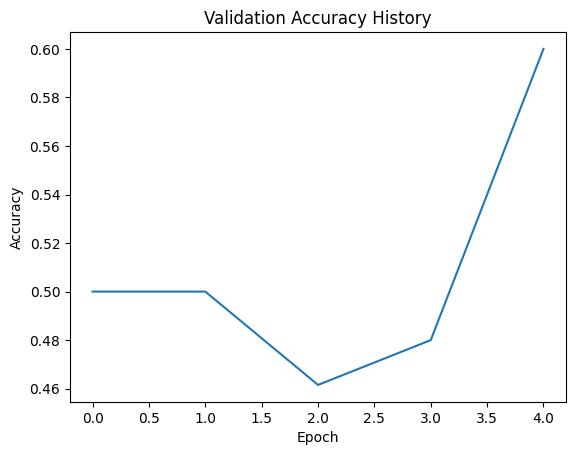

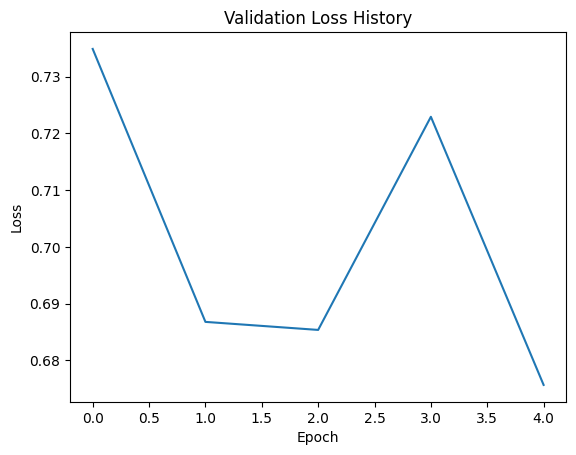

1/1 [==============================] - 0s 100ms/step - loss: 0.7248 - accuracy: 0.4286
Test Loss: 0.7248
Test Accuracy: 0.4286
1/1 [==============================] - 0s 183ms/step
Confusion Matrix:
[[0 4]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot the validation accuracy history
plt.plot(accuracy_scores)
plt.title('Validation Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot the validation loss history
plt.plot(loss_scores)
plt.title('Validation Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict the labels for the testing data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Report performance study metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [14]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt

# Initialize lists to store accuracy for different configurations
train_acc_config1 = []
val_acc_config1 = []
train_acc_config2 = []
val_acc_config2 = []

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Iterate over the folds
for fold, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train), 1):
    print(f"Training for fold {fold}...")

    # Get the training and validation data for the current fold
    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    Y_train_fold, Y_validation_fold = Y_train[train_index], Y_train[validation_index]

    # Convert grayscale images to RGB
    if X_train_fold.shape[-1] == 1:
        X_train_fold = np.repeat(X_train_fold, 3, axis=-1)
    if X_validation_fold.shape[-1] == 1:
        X_validation_fold = np.repeat(X_validation_fold, 3, axis=-1)

    # Reshape the labels to match the shape of the logits
    Y_train_fold = np.expand_dims(Y_train_fold, axis=-1)
    Y_validation_fold = np.expand_dims(Y_validation_fold, axis=-1)

    # Build and compile the model architecture - Configuration 1
    model_config1 = Sequential()
    model_config1.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_config1.add(Flatten())
    model_config1.add(Dense(64, activation='relu'))
    model_config1.add(Dense(1, activation='sigmoid'))
    optimizer_config1 = SGD(learning_rate=0.01)
    model_config1.compile(loss='binary_crossentropy', optimizer=optimizer_config1, metrics=['accuracy'])

    # Build and compile the model architecture - Configuration 2
    model_config2 = Sequential()
    model_config2.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_config2.add(Flatten())
    model_config2.add(Dense(64, activation='relu'))
    model_config2.add(Dense(64, activation='relu'))
    model_config2.add(Dense(64, activation='relu'))
    model_config2.add(Dense(1, activation='sigmoid'))
    optimizer_config2 = SGD(learning_rate=0.01)
    model_config2.compile(loss='binary_crossentropy', optimizer=optimizer_config2, metrics=['accuracy'])

    start_time = time.time()

    # Train the model for 20 epochs - Configuration 1
    history_config1 = model_config1.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    # Train the model for 20 epochs - Configuration 2
    history_config2 = model_config2.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time
    print(f"Time taken for fold {fold}: {fold_time:.2f} seconds")

    # Evaluate the models on the validation data - Configuration 1
    _, train_accuracy_config1 = model_config1.evaluate(X_train_fold, Y_train_fold, verbose=0)
    _, val_accuracy_config1 = model_config1.evaluate(X_validation_fold, Y_validation_fold, verbose=0)

    # Evaluate the models on the validation data - Configuration 2
    _, train_accuracy_config2 = model_config2.evaluate(X_train_fold, Y_train_fold, verbose=0)
    _, val_accuracy_config2 = model_config2.evaluate(X_validation_fold, Y_validation_fold, verbose=0)

    # Store the accuracies
    train_acc_config1.append(train_accuracy_config1)
    val_acc_config1.append(val_accuracy_config1)
    train_acc_config2.append(train_accuracy_config2)
    val_acc_config2.append(val_accuracy_config2)

# Calculate the average evaluation metrics across all folds
avg_train_acc_config1 = np.mean(train_acc_config1)
avg_val_acc_config1 = np.mean(val_acc_config1)
avg_train_acc_config2 = np.mean(train_acc_config2)
avg_val_acc_config2 = np.mean(val_acc_config2)


Training for fold 1...
Time taken for fold 1: 160.88 seconds
Training for fold 2...
Time taken for fold 2: 160.83 seconds
Training for fold 3...
Time taken for fold 3: 140.64 seconds
Training for fold 4...
Time taken for fold 4: 163.83 seconds
Training for fold 5...
Time taken for fold 5: 149.79 seconds


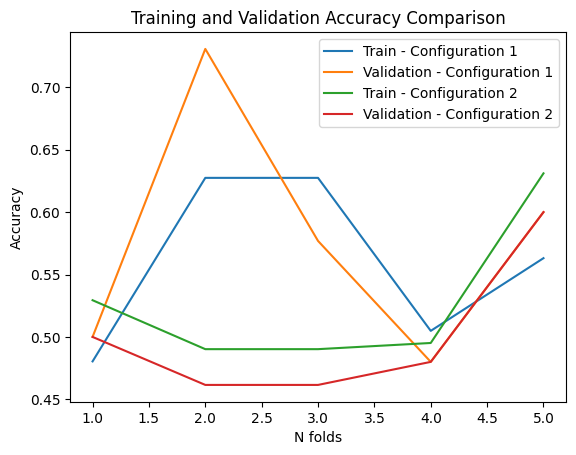

Configuration 1 - Average Training Accuracy: 0.5606510639190674
Configuration 1 - Average Validation Accuracy: 0.5775384604930878
Configuration 2 - Average Training Accuracy: 0.5272035002708435
Configuration 2 - Average Validation Accuracy: 0.5006153881549835
Total time taken for 5 folds and 20 epochs: 1225.35 seconds


In [15]:
# Plot the comparison of training and validation accuracy
epochs = range(1, 6)
plt.plot(epochs, train_acc_config1, label='Train - Configuration 1')
plt.plot(epochs, val_acc_config1, label='Validation - Configuration 1')
plt.plot(epochs, train_acc_config2, label='Train - Configuration 2')
plt.plot(epochs, val_acc_config2, label='Validation - Configuration 2')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('N folds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print the average evaluation metrics and total time taken
print("Configuration 1 - Average Training Accuracy:", avg_train_acc_config1)
print("Configuration 1 - Average Validation Accuracy:", avg_val_acc_config1)
print("Configuration 2 - Average Training Accuracy:", avg_train_acc_config2)
print("Configuration 2 - Average Validation Accuracy:", avg_val_acc_config2)
print(f"Total time taken for {n_splits} folds and 20 epochs: {total_time:.2f} seconds")

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [17]:
##---------Type the code below this line------------------##
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.legacy import SGD
# Define the number of folds for cross-validation
n_splits = 5

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
val_accuracy_scores_1 = []  # Accuracy scores for dropout ratio 0.25
val_accuracy_scores_2 = []
accuracy_scores_1 = []  # Accuracy scores for dropout ratio 0.25
accuracy_scores_2 = []   # Accuracy scores for dropout ratio 0.25 with L2 regularization
loss_scores = []
total_time = 0

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Iterate over the folds
for fold, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train), 1):
    print(f"Training for fold {fold}...")

    # Get the training and validation data for the current fold
    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    Y_train_fold, Y_validation_fold = Y_train[train_index], Y_train[validation_index]

    # Convert grayscale images to RGB
    if X_train_fold.shape[-1] == 1:
        X_train_fold = np.repeat(X_train_fold, 3, axis=-1)
    if X_validation_fold.shape[-1] == 1:
        X_validation_fold = np.repeat(X_validation_fold, 3, axis=-1)

    # Reshape the labels to match the shape of the logits
    Y_train_fold = np.expand_dims(Y_train_fold, axis=-1)
    Y_validation_fold = np.expand_dims(Y_validation_fold, axis=-1)

    # Build the model architecture with Dropout of ratio 0.25
    model_1 = Sequential()
    model_1.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_1.add(Flatten())
    model_1.add(Dense(64, activation='relu'))
    model_1.add(Dense(64, activation='relu'))
    model_1.add(Dropout(0.25))
    model_1.add(Dense(1, activation='sigmoid'))

    # Compile the model with appropriate optimizer and metrics
    optimizer = SGD(learning_rate=0.01)
    model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Build the model architecture with Dropout of ratio 0.25 and L2 regularization
    model_2 = Sequential()
    model_2.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_2.add(Flatten())
    model_2.add(Dense(64, activation='relu'))
    model_2.add(Dropout(0.25))
    model_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-04)))
    model_2.add(Dropout(0.25))
    model_2.add(Dense(1, activation='sigmoid'))

    # Compile the model with appropriate optimizer and metrics
    model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    start_time = time.time()

    # Train the model with Dropout of ratio 0.25 for 20 epochs
    model_1.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    # Train the model with Dropout of ratio 0.25 and L2 regularization for 20 epochs
    model_2.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time
    print(f"Time taken for fold {fold}: {fold_time:.2f} seconds")

    # Evaluate the models on the validation data
    _, val_accuracy_1 = model_1.evaluate(X_validation_fold, Y_validation_fold, verbose=0)
    _, val_accuracy_2 = model_2.evaluate(X_validation_fold, Y_validation_fold, verbose=0)
    _, train_accuracy_1 = model_1.evaluate(X_train_fold, Y_train_fold, verbose=0)
    _, train_accuracy_2 = model_2.evaluate(X_train_fold, Y_train_fold, verbose=0)

    print(f"Accuracy for fold {fold} (Dropout 0.25):", train_accuracy_1)
    print(f"Accuracy for fold {fold} (Dropout 0.25 with L2):", train_accuracy_2)

    # Store the evaluation metrics
    val_accuracy_scores_1.append(val_accuracy_1)
    val_accuracy_scores_2.append(val_accuracy_2)
    accuracy_scores_1.append(train_accuracy_1)
    accuracy_scores_2.append(train_accuracy_2)

# Calculate the average evaluation metrics across all folds
avg_accuracy_1 = np.mean(accuracy_scores_1)
avg_accuracy_2 = np.mean(accuracy_scores_2)

# Print the average evaluation metrics and total time taken
print("Average Accuracy (Dropout 0.25):", avg_accuracy_1)
print("Average Accuracy (Dropout 0.25 with L2):", avg_accuracy_2)
print(f"Total time taken for {n_splits} folds and 20 epochs: {total_time:.2f} seconds")

Training for fold 1...
Time taken for fold 1: 198.70 seconds
Accuracy for fold 1 (Dropout 0.25): 0.5392156839370728
Accuracy for fold 1 (Dropout 0.25 with L2): 0.529411792755127
Training for fold 2...
Time taken for fold 2: 194.22 seconds
Accuracy for fold 2 (Dropout 0.25): 0.7745097875595093
Accuracy for fold 2 (Dropout 0.25 with L2): 0.5196078419685364
Training for fold 3...
Time taken for fold 3: 198.36 seconds
Accuracy for fold 3 (Dropout 0.25): 0.5
Accuracy for fold 3 (Dropout 0.25 with L2): 0.4901960790157318
Training for fold 4...
Time taken for fold 4: 194.01 seconds
Accuracy for fold 4 (Dropout 0.25): 0.5631067752838135
Accuracy for fold 4 (Dropout 0.25 with L2): 0.5728155374526978
Training for fold 5...
Time taken for fold 5: 193.06 seconds
Accuracy for fold 5 (Dropout 0.25): 0.48543688654899597
Accuracy for fold 5 (Dropout 0.25 with L2): 0.5048543810844421
Average Accuracy (Dropout 0.25): 0.5724538266658783
Average Accuracy (Dropout 0.25 with L2): 0.523377126455307
Total tim

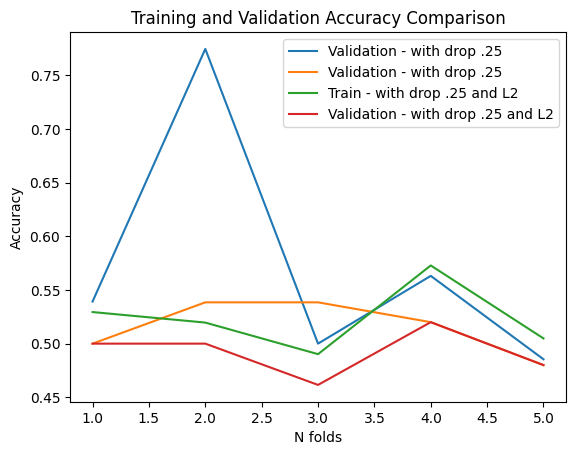

In [18]:
# Plot the comparison of training and validation accuracy
epochs = range(1, 6)
plt.plot(epochs, accuracy_scores_1, label='Validation - with drop .25')
plt.plot(epochs, val_accuracy_scores_1, label='Validation - with drop .25')
plt.plot(epochs, accuracy_scores_2, label='Train - with drop .25 and L2')
plt.plot(epochs, val_accuracy_scores_2, label='Validation - with drop .25 and L2')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('N folds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [20]:
##---------Type the code below this line------------------##
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
n_splits = 5

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
val_accuracy_scores_RMS = []  # Accuracy scores for dropout ratio 0.25
val_accuracy_scores_ADM = []
accuracy_scores_RMS = []  # Accuracy scores for dropout ratio 0.25
accuracy_scores_ADM = []   # Accuracy scores for dropout ratio 0.25 with L2 regularization
loss_scores = []
total_time = 0

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Iterate over the folds
for fold, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train), 1):
    print(f"Training for fold {fold}...")

    # Get the training and validation data for the current fold
    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    Y_train_fold, Y_validation_fold = Y_train[train_index], Y_train[validation_index]

    # Convert grayscale images to RGB
    if X_train_fold.shape[-1] == 1:
        X_train_fold = np.repeat(X_train_fold, 3, axis=-1)
    if X_validation_fold.shape[-1] == 1:
        X_validation_fold = np.repeat(X_validation_fold, 3, axis=-1)

    # Reshape the labels to match the shape of the logits
    Y_train_fold = np.expand_dims(Y_train_fold, axis=-1)
    Y_validation_fold = np.expand_dims(Y_validation_fold, axis=-1)

    # Build the model architecture with Dropout of ratio 0.25
    model_1 = Sequential()
    model_1.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_1.add(Flatten())
    model_1.add(Dense(64, activation='relu'))
    model_1.add(Dense(64, activation='relu'))
    model_1.add(Dense(1, activation='sigmoid'))

    # Compile the model with appropriate optimizer and metrics
    optimizer1 = RMSprop(learning_rate=0.001, rho=0.9)
    model_1.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

    # Build the model architecture with Dropout of ratio 0.25 and L2 regularization
    model_2 = Sequential()
    model_2.add(Dense(units=8, activation='relu', input_shape=(300, 300, 3)))
    model_2.add(Flatten())
    model_2.add(Dense(64, activation='relu'))
    model_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-04)))
    model_2.add(Dense(1, activation='sigmoid'))

    optimizer2=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
    # Compile the model with appropriate optimizer and metrics
    model_2.compile(loss='binary_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

    start_time = time.time()

    # Train the model with Dropout of ratio 0.25 for 20 epochs
    model_1.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    # Train the model with Dropout of ratio 0.25 and L2 regularization for 20 epochs
    model_2.fit(datagen.flow(X_train_fold, Y_train_fold, batch_size=32), epochs=20, verbose=0)

    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time
    print(f"Time taken for fold {fold}: {fold_time:.2f} seconds")

    # Evaluate the models on the validation data
    _, val_accuracy_1 = model_1.evaluate(X_validation_fold, Y_validation_fold, verbose=0)
    _, val_accuracy_2 = model_2.evaluate(X_validation_fold, Y_validation_fold, verbose=0)
    _, train_accuracy_1 = model_1.evaluate(X_train_fold, Y_train_fold, verbose=0)
    _, train_accuracy_2 = model_2.evaluate(X_train_fold, Y_train_fold, verbose=0)

    print(f"Accuracy for fold {fold} (RMS optimizer):", train_accuracy_1)
    print(f"Accuracy for fold {fold} (adms optimizer):", train_accuracy_2)

    # Store the evaluation metrics
    val_accuracy_scores_RMS.append(val_accuracy_1)
    val_accuracy_scores_ADM.append(val_accuracy_2)
    accuracy_scores_RMS.append(train_accuracy_1)
    accuracy_scores_ADM.append(train_accuracy_2)

# Calculate the average evaluation metrics across all folds
avg_accuracy_1 = np.mean(accuracy_scores_RMS)
avg_accuracy_2 = np.mean(accuracy_scores_ADM)

# Print the average evaluation metrics and total time taken
print("Average Accuracy using RMS:", avg_accuracy_1)
print("Average Accuracy using adam:", avg_accuracy_2)
print(f"Total time taken for {n_splits} folds and 20 epochs: {total_time:.2f} seconds")

Training for fold 1...
Time taken for fold 1: 224.96 seconds
Accuracy for fold 1 (RMS optimizer): 0.5196078419685364
Accuracy for fold 1 (adms optimizer): 0.5882353186607361
Training for fold 2...
Time taken for fold 2: 209.55 seconds
Accuracy for fold 2 (RMS optimizer): 0.7058823704719543
Accuracy for fold 2 (adms optimizer): 0.5196078419685364
Training for fold 3...
Time taken for fold 3: 208.98 seconds
Accuracy for fold 3 (RMS optimizer): 0.4901960790157318
Accuracy for fold 3 (adms optimizer): 0.7745097875595093
Training for fold 4...
Time taken for fold 4: 219.81 seconds
Accuracy for fold 4 (RMS optimizer): 0.5145630836486816
Accuracy for fold 4 (adms optimizer): 0.6504854559898376
Training for fold 5...
Time taken for fold 5: 234.16 seconds
Accuracy for fold 5 (RMS optimizer): 0.48543688654899597
Accuracy for fold 5 (adms optimizer): 0.5145630836486816
Average Accuracy using RMS: 0.54313725233078
Average Accuracy using adam: 0.6094802975654602
Total time taken for 5 folds and 20 

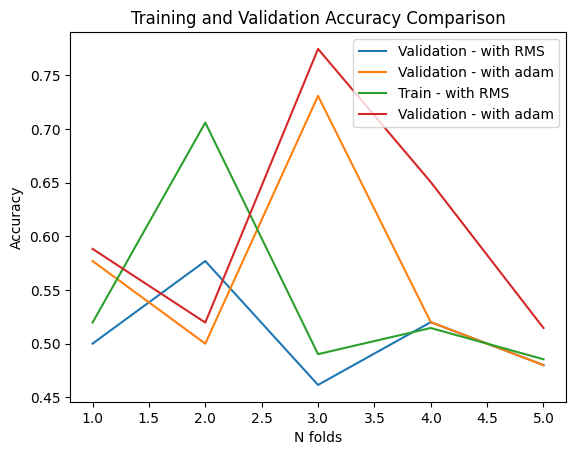

In [21]:
# Plot the comparison of training and validation accuracy
epochs = range(1, 6)
plt.plot(epochs, val_accuracy_scores_RMS, label='Validation - with RMS')
plt.plot(epochs, val_accuracy_scores_ADM, label='Validation - with adam')
plt.plot(epochs, accuracy_scores_RMS, label='Train - with RMS')
plt.plot(epochs, accuracy_scores_ADM, label='Validation - with adam')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('N folds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##



#Conclusion summary


Configuration 1:

Model Architecture: 4 layers (1 input, 2 hidden, 1 output)
Average Training Accuracy: 0.5606510639190674
Average Validation Accuracy: 0.5775384604930878
Conclusion: By decreasing the number of layers from the initial 4-layer configuration, there was a slight improvement in both the training and validation accuracies. However, the overall accuracies are still relatively low, indicating that the model may not be capturing the underlying patterns in the data effectively.

Configuration 2:

Model Architecture: 5 layers (1 input, 3 hidden, 1 output)
Average Training Accuracy: 0.5272035002708435
Average Validation Accuracy: 0.5006153881549835
Conclusion: By increasing the number of layers to 5, there was a decrease in both the training and validation accuracies. This suggests that adding an extra layer without further adjustments may have introduced unnecessary complexity, leading to a less effective model.

Dropout Regularization:

Configuration 1: Dropout ratio of 0.25
Average Accuracy: 0.5724538266658783
Configuration 2: Dropout ratio of 0.25 with L2 regularization (factor 1e-4)
Average Accuracy: 0.523377126455307
Conclusion: The addition of dropout regularization helped improve the average accuracy compared to the initial configurations. Configuration 1, which only used dropout, performed slightly better than Configuration 2, which combined dropout with L2 regularization. This suggests that dropout alone was sufficient in this case to mitigate overfitting and improve model performance.
Different Optimizers:

RMSProp:
Average Accuracy: 0.54313725233078
Adam:
Average Accuracy: 0.6094802975654602

Conclusion: Using different optimizers resulted in varying average accuracies. The Adam optimizer outperformed RMSProp, achieving a higher average accuracy. This highlights the importance of choosing an appropriate optimizer for the specific problem, as different optimizers have different update rules and convergence behaviors.

In summary, the initial 4-layer configuration showed low accuracies, but there were some improvements when modifying the architecture (decreasing layers), applying dropout regularization, and using different optimizers. However, the achieved accuracies are still relatively modest, indicating that further adjustments and tuning may be necessary to improve the model's performance.

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck